In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f1e11bd690>)

In [4]:
import pandas as pd
import numpy as np

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [10]:
#Default styles for chart
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(medical_df,
                   x='age',
                  marginal ='box',
                  nbins =47,
                  title = 'Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x='bmi',
                  marginal ='box',
                  color_discrete_sequence = ['red'],
                  title = 'Distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                  marginal ='box',
                  color='smoker',
                   color_discrete_sequence=['green','grey'],
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x='sex',
                  marginal ='box',
                  color='smoker',
                   color_discrete_sequence=['green','grey'],
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,
                   x='region',
                  marginal ='box',
                  color='smoker',
                   color_discrete_sequence=['green','grey'],
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
px.histogram(medical_df,x='smoker',color='sex',title='Smokers')

In [19]:
fig = px.scatter(medical_df,
                   x='age',
                   y='charges',
                  color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                  title = 'Age vs Sex')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig = px.scatter(medical_df,
                   x='bmi',
                   y='charges',
                  color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                  title = 'BMI vs Sex')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
px.violin(medical_df,x='children',y='charges')

In [22]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [23]:
medical_df['charges'].corr(medical_df['bmi'])

0.19834096883362892

In [24]:
smoker_values ={'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [25]:
df_numeric_elements = medical_df[['age','bmi','children','charges']]

In [26]:
df_numeric_elements.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation Matrix')

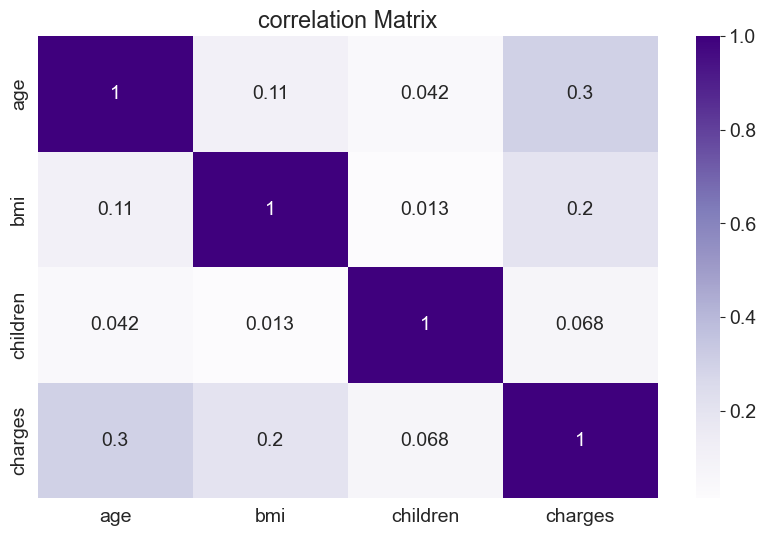

In [27]:
sns.heatmap(df_numeric_elements.corr(),cmap='Purples',annot=True)
plt.title("correlation Matrix")

In [28]:
non_smoker = medical_df[medical_df.smoker=='no']


In [29]:
smoker_df = medical_df[medical_df.smoker=='yes']

In [30]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [31]:
non_smoker


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

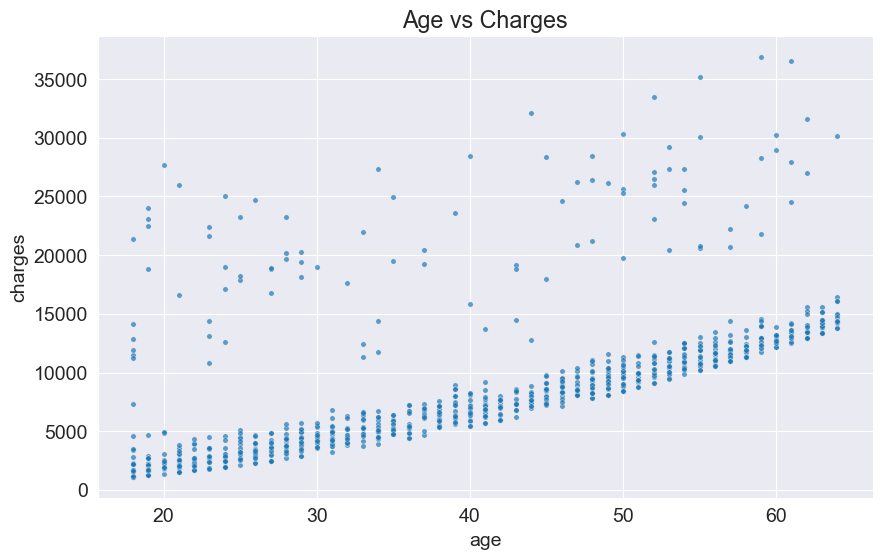

In [32]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker,x='age',y='charges',alpha=0.7,s=15)

In [33]:
fig = px.scatter(
                  non_smoker,
                  x='age',
                  y='charges',   
                  title = 'Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [34]:
def estimate_charges(age,w,b):
    return w*age+b

In [35]:
w=50
b=100

estimate_charges(30,w,b)


1600

In [36]:
ages = medical_df[:1064].age

In [37]:
ages

0       19
1       18
2       28
3       33
4       32
        ..
1059    32
1060    24
1061    57
1062    59
1063    36
Name: age, Length: 1064, dtype: int64

In [38]:
estimated_charges = estimate_charges(ages,w,b)

In [39]:
estimated_charges

0       1050
1       1000
2       1500
3       1750
4       1700
        ... 
1059    1700
1060    1300
1061    2950
1062    3050
1063    1900
Name: age, Length: 1064, dtype: int64

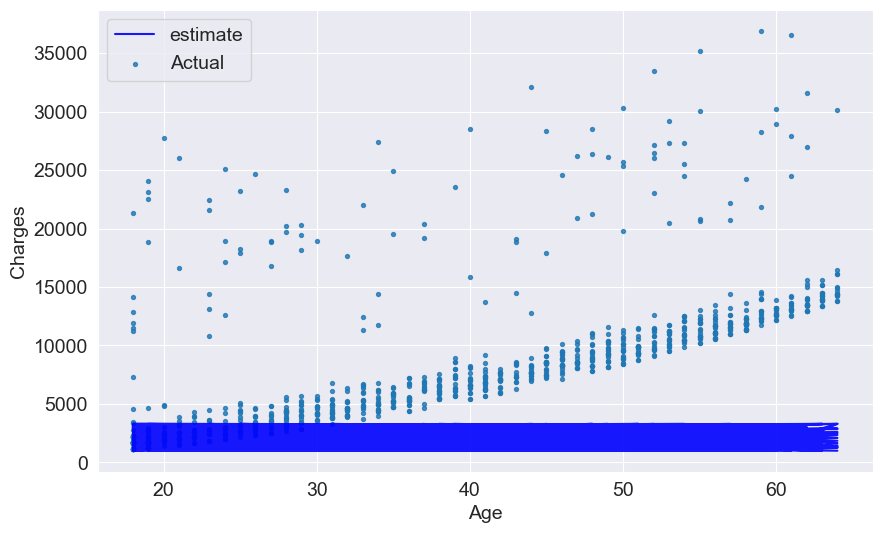

In [40]:
ages = non_smoker.age
target = non_smoker.charges

plt.plot(ages,estimated_charges,'blue',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['estimate','Actual'])

In [41]:
def try_parameters(w,b):
    ages = non_smoker.age
    target = non_smoker.charges

    estimated_charges = estimate_charges(ages,w,b) 

    plt.plot(ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['estimate','Actual'])

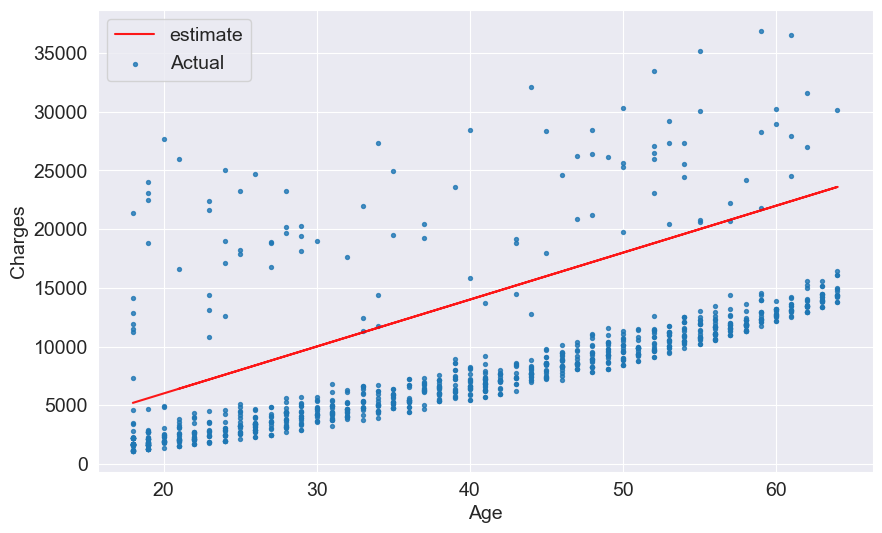

In [42]:
try_parameters(400,-2000)

In [43]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [44]:
rmse(50,100)

50.0

In [45]:
w,b=50,100


In [46]:
targets = non_smoker['charges']
prediction = estimate_charges(non_smoker.age,w,b)

In [47]:
rmse(targets,prediction)

8461.949562575493

In [48]:
def try_parameters(w,b):
    ages = non_smoker.age
    target = non_smoker.charges
    predictions = estimate_charges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual'])

    loss = rmse(target,predictions)
    print('RMSE Loss: ',loss)

RMSE Loss:  8461.949562575493


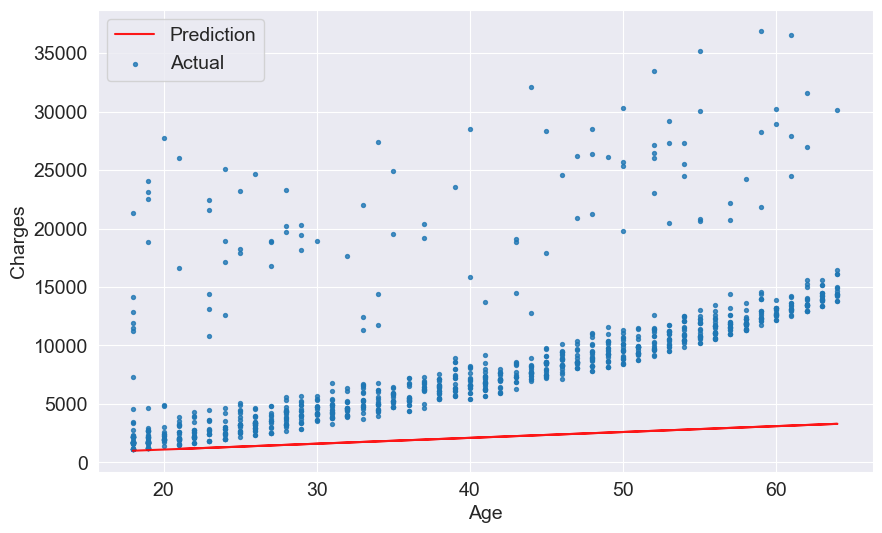

In [49]:
try_parameters(50,100)

RMSE Loss:  4991.993804156943


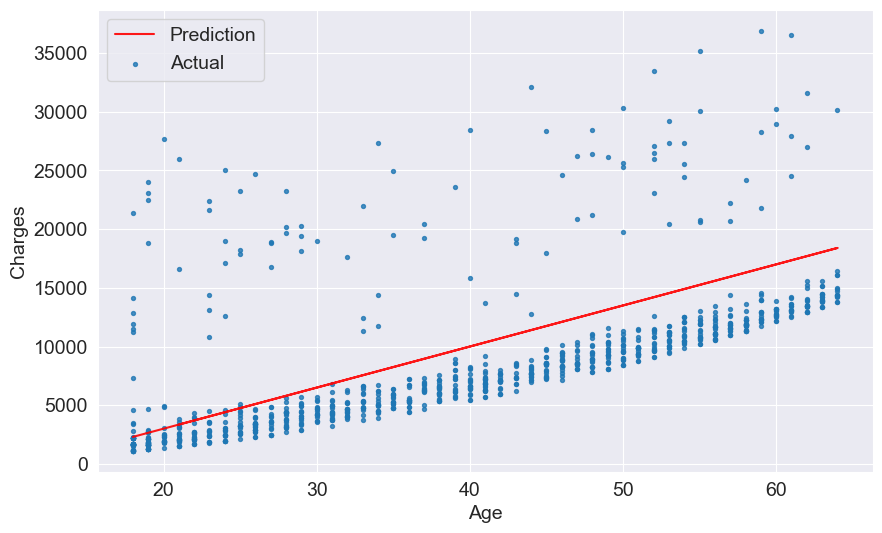

In [50]:
try_parameters(350,-4000)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [54]:
inputs = non_smoker[['age']]
targets = non_smoker['charges']
print('Inputs.shape :',inputs.shape)
print('targets.shape :',targets.shape)

Inputs.shape : (1064, 1)
targets.shape : (1064,)


In [55]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
import pandas as pd

new_data = pd.DataFrame({'age': [23, 37, 61]})
model.predict(new_data)


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [57]:
predictions = model.predict(inputs)

In [58]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [59]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [60]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

rmse(targets,predictions)


4662.505766636395

In [61]:
#w
model.coef_

array([267.24891283])

In [62]:
#b
model.intercept_

-2091.4205565650864

In [63]:
def try_parameters(w,b):
    ages = non_smoker.age
    target = non_smoker.charges
    predictions = estimate_charges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual'])

    loss = rmse(target,predictions)
    print('RMSE Loss: ',loss)

RMSE Loss:  4662.505766636395


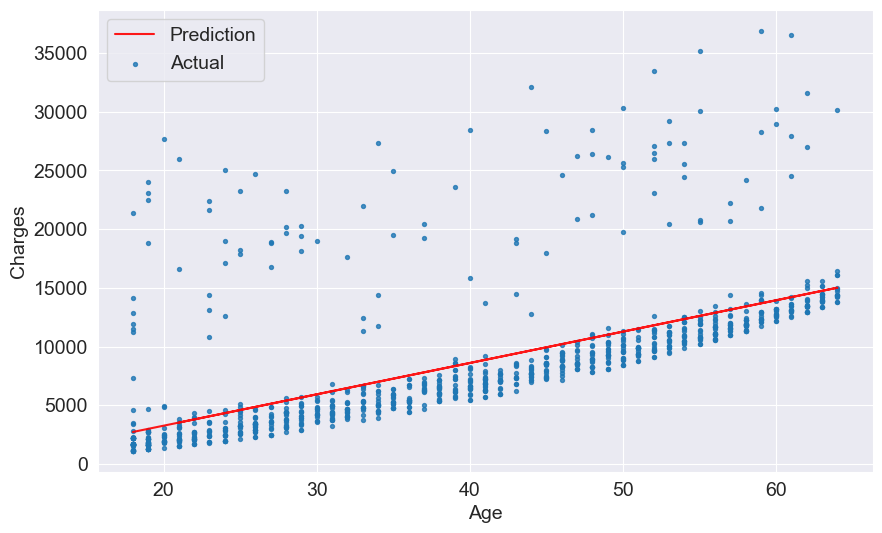

In [64]:
try_parameters(model.coef_,model.intercept_)

In [65]:
inputs,targets = non_smoker[['age']],non_smoker['charges']

In [66]:
model = LinearRegression().fit(inputs,targets)

In [67]:
predictions = model.predict(inputs)

In [68]:
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  4662.505766636395


In [69]:
#multiple features

In [70]:
inputs,targets = non_smoker[['age','bmi']],non_smoker['charges']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  4662.3128354612945


In [71]:
non_smoker.charges.corr(non_smoker.bmi)

0.08403654312833272

In [72]:
fig = px.scatter(non_smoker,x='bmi',y='charges' ,title = 'BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [73]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [74]:
fig = px.strip(non_smoker,x='children',y='charges' ,title = 'children vs Charges')
fig.update_traces(marker_size=5,marker_opacity=0.7)
fig.show()

In [75]:
inputs,targets = medical_df[['age','bmi','children']],medical_df['charges']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  11355.317901125973


<Axes: xlabel='smoker', ylabel='charges'>

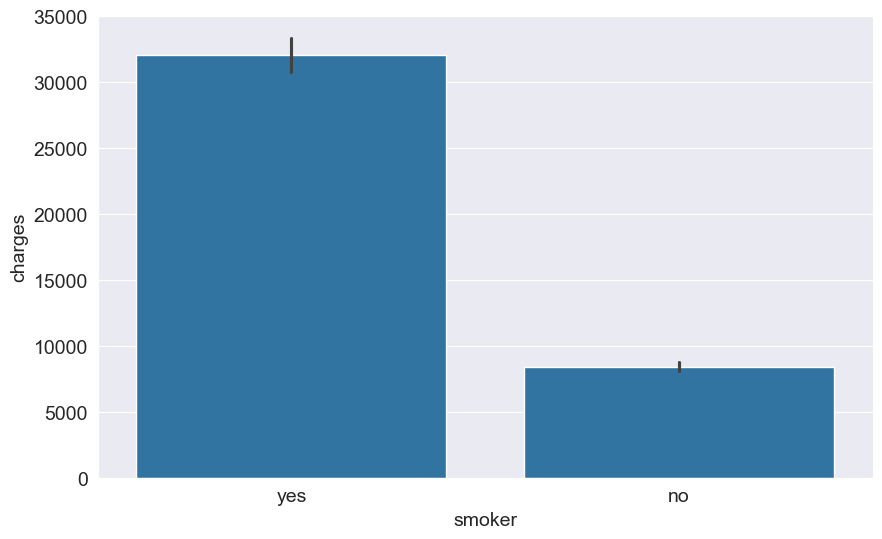

In [76]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [77]:
smoker_codes = {'no':0,'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [78]:
sex_codes = {'female':0,'male':1}
medical_df['sex_codes'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_codes)

0.057292062202025415

In [79]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [80]:
#charges = w1xage + w2xbmi + w3xcharges + w4xsmoker +b

In [81]:
inputs,targets = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']

In [82]:
model = LinearRegression().fit(inputs,targets)

In [83]:
predictions = model.predict(inputs)

In [84]:
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.439217188081


In [85]:
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

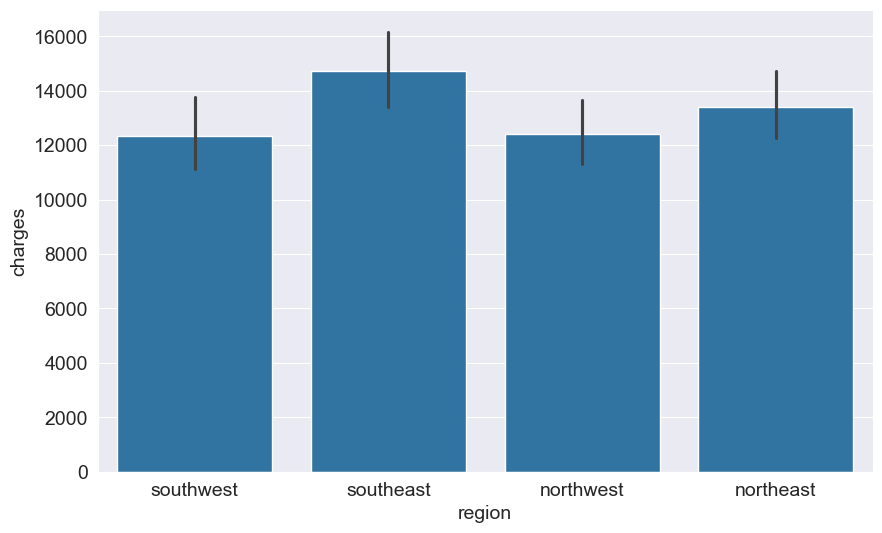

In [86]:
sns.barplot(data = medical_df, x='region', y='charges')

from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

In [87]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [88]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [89]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [90]:
inputs,targets = medical_df[['age','bmi','children','smoker_code','northeast', 'northwest', 'southeast', 'southwest','sex_codes']],medical_df['charges']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6041.6796511744515


In [91]:
inputs.loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
sex_codes       1.00
Name: 10, dtype: float64

In [92]:
model.predict([[28,30,0,1,0,0,0,1,1]])

C:\Users\MSI\anaconda3\envs\newplot\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([28186.41209442])

In [93]:
X = medical_df[['age','bmi','children','smoker_code',
                'northeast','northwest','southeast','southwest','sex_codes']]
y = medical_df['charges']


In [94]:
X_new = pd.DataFrame(
    [[28,30,0,1,0,0,0,1,1]],
    columns=X.columns
)

model.predict(X_new)


array([28186.41209442])

In [95]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         587.00923503,   234.0453356 ,  -448.01281436,  -373.04175627,
        -131.3143594 ])

In [96]:
model.intercept_

-12525.54781119544

In [97]:
input_cols = ['age','bmi','children','smoker_code','northeast', 'northwest', 'southeast', 'southwest','sex_codes']

In [98]:
weight_df = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,northeast,587.009235
5,northwest,234.045336
6,southeast,-448.012814
7,southwest,-373.041756
8,sex_codes,-131.314359
9,1,-12525.547811


In [99]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         587.00923503,   234.0453356 ,  -448.01281436,  -373.04175627,
        -131.3143594 ])

In [100]:
from sklearn.preprocessing import StandardScaler 

In [101]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [102]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [103]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [104]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [105]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [106]:
cat_cols = ['smoker_code','northeast', 'northwest', 'southeast', 'southwest','sex_codes']
categorical_data = medical_df[cat_cols].values

In [109]:
categorical_data

array([[1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.]])

In [115]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis = 1)
targets = medical_df.charges

#Create and train mode
model = LinearRegression().fit(inputs,targets)

#Generate Prediction 
predictions = model.predict(inputs)

#Compute Loss
loss = rmse(targets,predictions)
print('Loss' , loss)

Loss 6041.6796511744515


In [116]:
weight_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
4,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
5,northwest,234.045336
8,sex_codes,-131.314359
7,southwest,-373.041756
6,southeast,-448.012814
9,1,-12525.547811


In [117]:
new_customers = [[28,30,0,1,0,0,0,1,1]]

In [118]:
scaler.transform([[28,30,0]])

C:\Users\MSI\anaconda3\envs\newplot\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659, -0.90861367]])

In [119]:
model.predict([[-0.79795355, -0.10882659, -0.90861367,1,0,0,0,1,1]])

array([28186.41209303])

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.1)

In [122]:
model = LinearRegression().fit(inputs_train,targets_train)
predictions_test = model.predict(inputs_test)

In [123]:
loss = rmse(targets_test,predictions_test)
print('Loss : ',loss)

Loss :  5349.182217752971


In [124]:
predictions_train = model.predict(inputs_train)

In [125]:
loss = rmse(targets_train,predictions_train)
print('Training Loss : ',loss)

Training Loss :  6116.746570526349
